In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
caminho = r'C:\Users\arthi\Documents\projetos\dados_vendas_v1.csv'
dados = pd.read_csv(caminho, delimiter=';')

In [5]:
dados_estilizados = dados.style.background_gradient(cmap='viridis')  # Usando gradiente de cor
dados_estilizados

,tipo_hospital,setor,quantidade,acessorio_adulto,acessorio_pediatrico,acessorio_neonatal,recursos_avancados,polegadas,central,target_modelo
0,privado,uti_adulto,10,sim,nao,nao,nao,15_pol,sim,bsm_3763
1,publico,unidade_emergencia,14,nao,sim,nao,nao,10_pol,nao,pvm_2703
2,publico,uti_pediatrica,8,nao,sim,sim,sim,15_pol,sim,bsm_3763
3,privado,uti_adulto,24,sim,sim,nao,sim,12_pol,sim,cu_151r
4,privado,uti_adulto,20,sim,sim,nao,sim,15_pol,sim,bsm_3763
5,privado,rpa,2,sim,sim,nao,nao,10_pol,sim,pvm_2703
6,publico,uti_adulto,4,sim,nao,nao,sim,15_pol,sim,cu_152r
7,publico,uti_neonatal,12,nao,nao,sim,nao,12_pol,sim,bsm_3562
8,publico,uti_adulto,10,sim,nao,nao,sim,15_pol,sim,bsm_3763
9,privado,centro_cirurgico,3,sim,nao,nao,sim,15_pol,nao,mu_671r


In [9]:
y = dados['target_modelo']

In [11]:
x = dados.drop('target_modelo',axis=1)

In [13]:
print(x.head())

  tipo_hospital               setor  quantidade acessorio_adulto  \
0       privado          uti_adulto          10              sim   
1       publico  unidade_emergencia          14              nao   
2       publico      uti_pediatrica           8              nao   
3       privado          uti_adulto          24              sim   
4       privado          uti_adulto          20              sim   

  acessorio_pediatrico acessorio_neonatal recursos_avancados polegadas central  
0                  nao                nao                nao    15_pol     sim  
1                  sim                nao                nao    10_pol     nao  
2                  sim                sim                sim    15_pol     sim  
3                  sim                nao                sim    12_pol     sim  
4                  sim                nao                sim    15_pol     sim  


In [15]:
print(y.head())

0    bsm_3763
1    pvm_2703
2    bsm_3763
3     cu_151r
4    bsm_3763
Name: target_modelo, dtype: object


In [17]:
x_dummies = pd.get_dummies(x)

In [19]:
x_dummies_columns = x_dummies.columns

In [21]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x_dummies, y, test_size=0.3, random_state=42)

# Para garantir que as colunas de treino e teste sejam iguais
#X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [23]:
print(X_treino)

     quantidade  tipo_hospital_privado  tipo_hospital_publico  \
103           8                   True                  False   
78            8                  False                   True   
28            6                  False                   True   
79            5                   True                  False   
5             2                   True                  False   
..          ...                    ...                    ...   
71           15                   True                  False   
14            1                   True                  False   
92           20                   True                  False   
51            8                   True                  False   
102           5                  False                   True   

     setor_centro_cirurgico  setor_rpa  setor_unidade_emergencia  \
103                    True      False                     False   
78                    False      False                     False   
28             

In [25]:
# Criar o classificador
arvore_classificadora = DecisionTreeClassifier(random_state=42)

In [27]:
# Treinar o modelo
arvore_classificadora.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [29]:
# Prever com o conjunto de teste
y_predito = arvore_classificadora.predict(X_teste)

Acurácia do modelo é de: 0.91
              precision    recall  f1-score   support
bsm_3562       1.000000  1.000000  1.000000   4.00000
bsm_3763       1.000000  0.727273  0.842105  11.00000
cu_151r        1.000000  1.000000  1.000000   2.00000
cu_152r        0.666667  1.000000  0.800000   6.00000
cu_171r        1.000000  1.000000  1.000000   1.00000
mu_671r        1.000000  1.000000  1.000000   1.00000
pvm_2703       1.000000  1.000000  1.000000   4.00000
pvm_4763       1.000000  1.000000  1.000000   3.00000
accuracy       0.906250  0.906250  0.906250   0.90625
macro avg      0.958333  0.965909  0.955263  32.00000
weighted avg   0.937500  0.906250  0.908224  32.00000


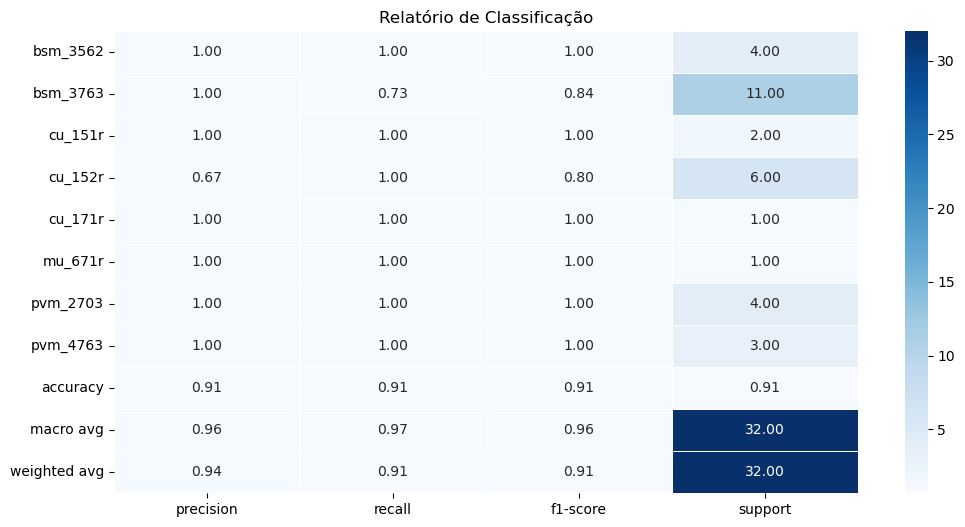

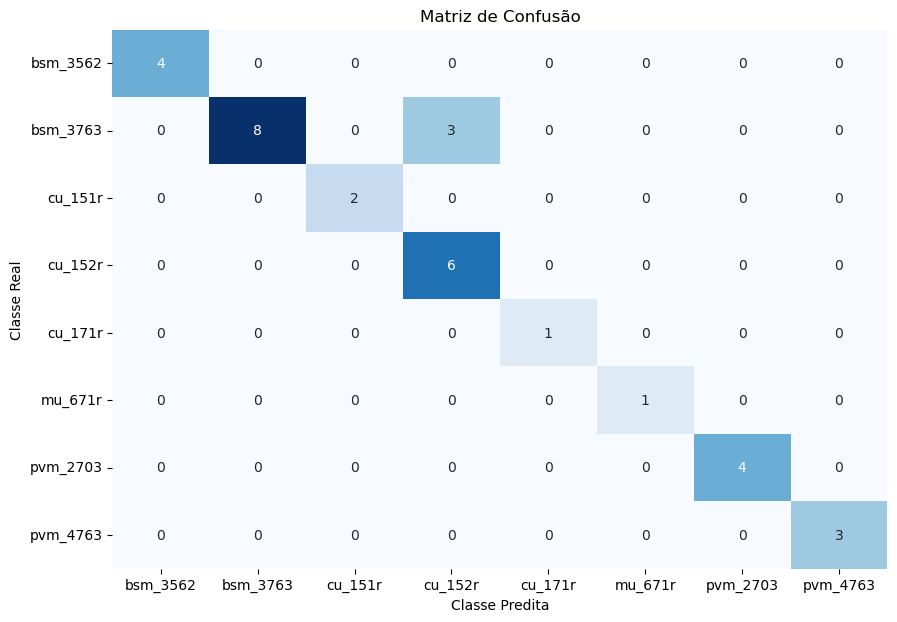

In [31]:
# Avaliar a precisão
acuracia = accuracy_score(y_teste, y_predito)
print(f'Acurácia do modelo é de: {acuracia:.2f}')

# Relatório de classificação
#print(classification_report(y_teste, y_predito))
# Gerar o relatório de classificação
report = classification_report(y_teste, y_predito, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotando a tabela
plt.figure(figsize=(12, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Relatório de Classificação')
plt.show()

# Matriz de confusão
classes = sorted(set(y_teste))
cm = confusion_matrix(y_teste, y_predito, labels=classes)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

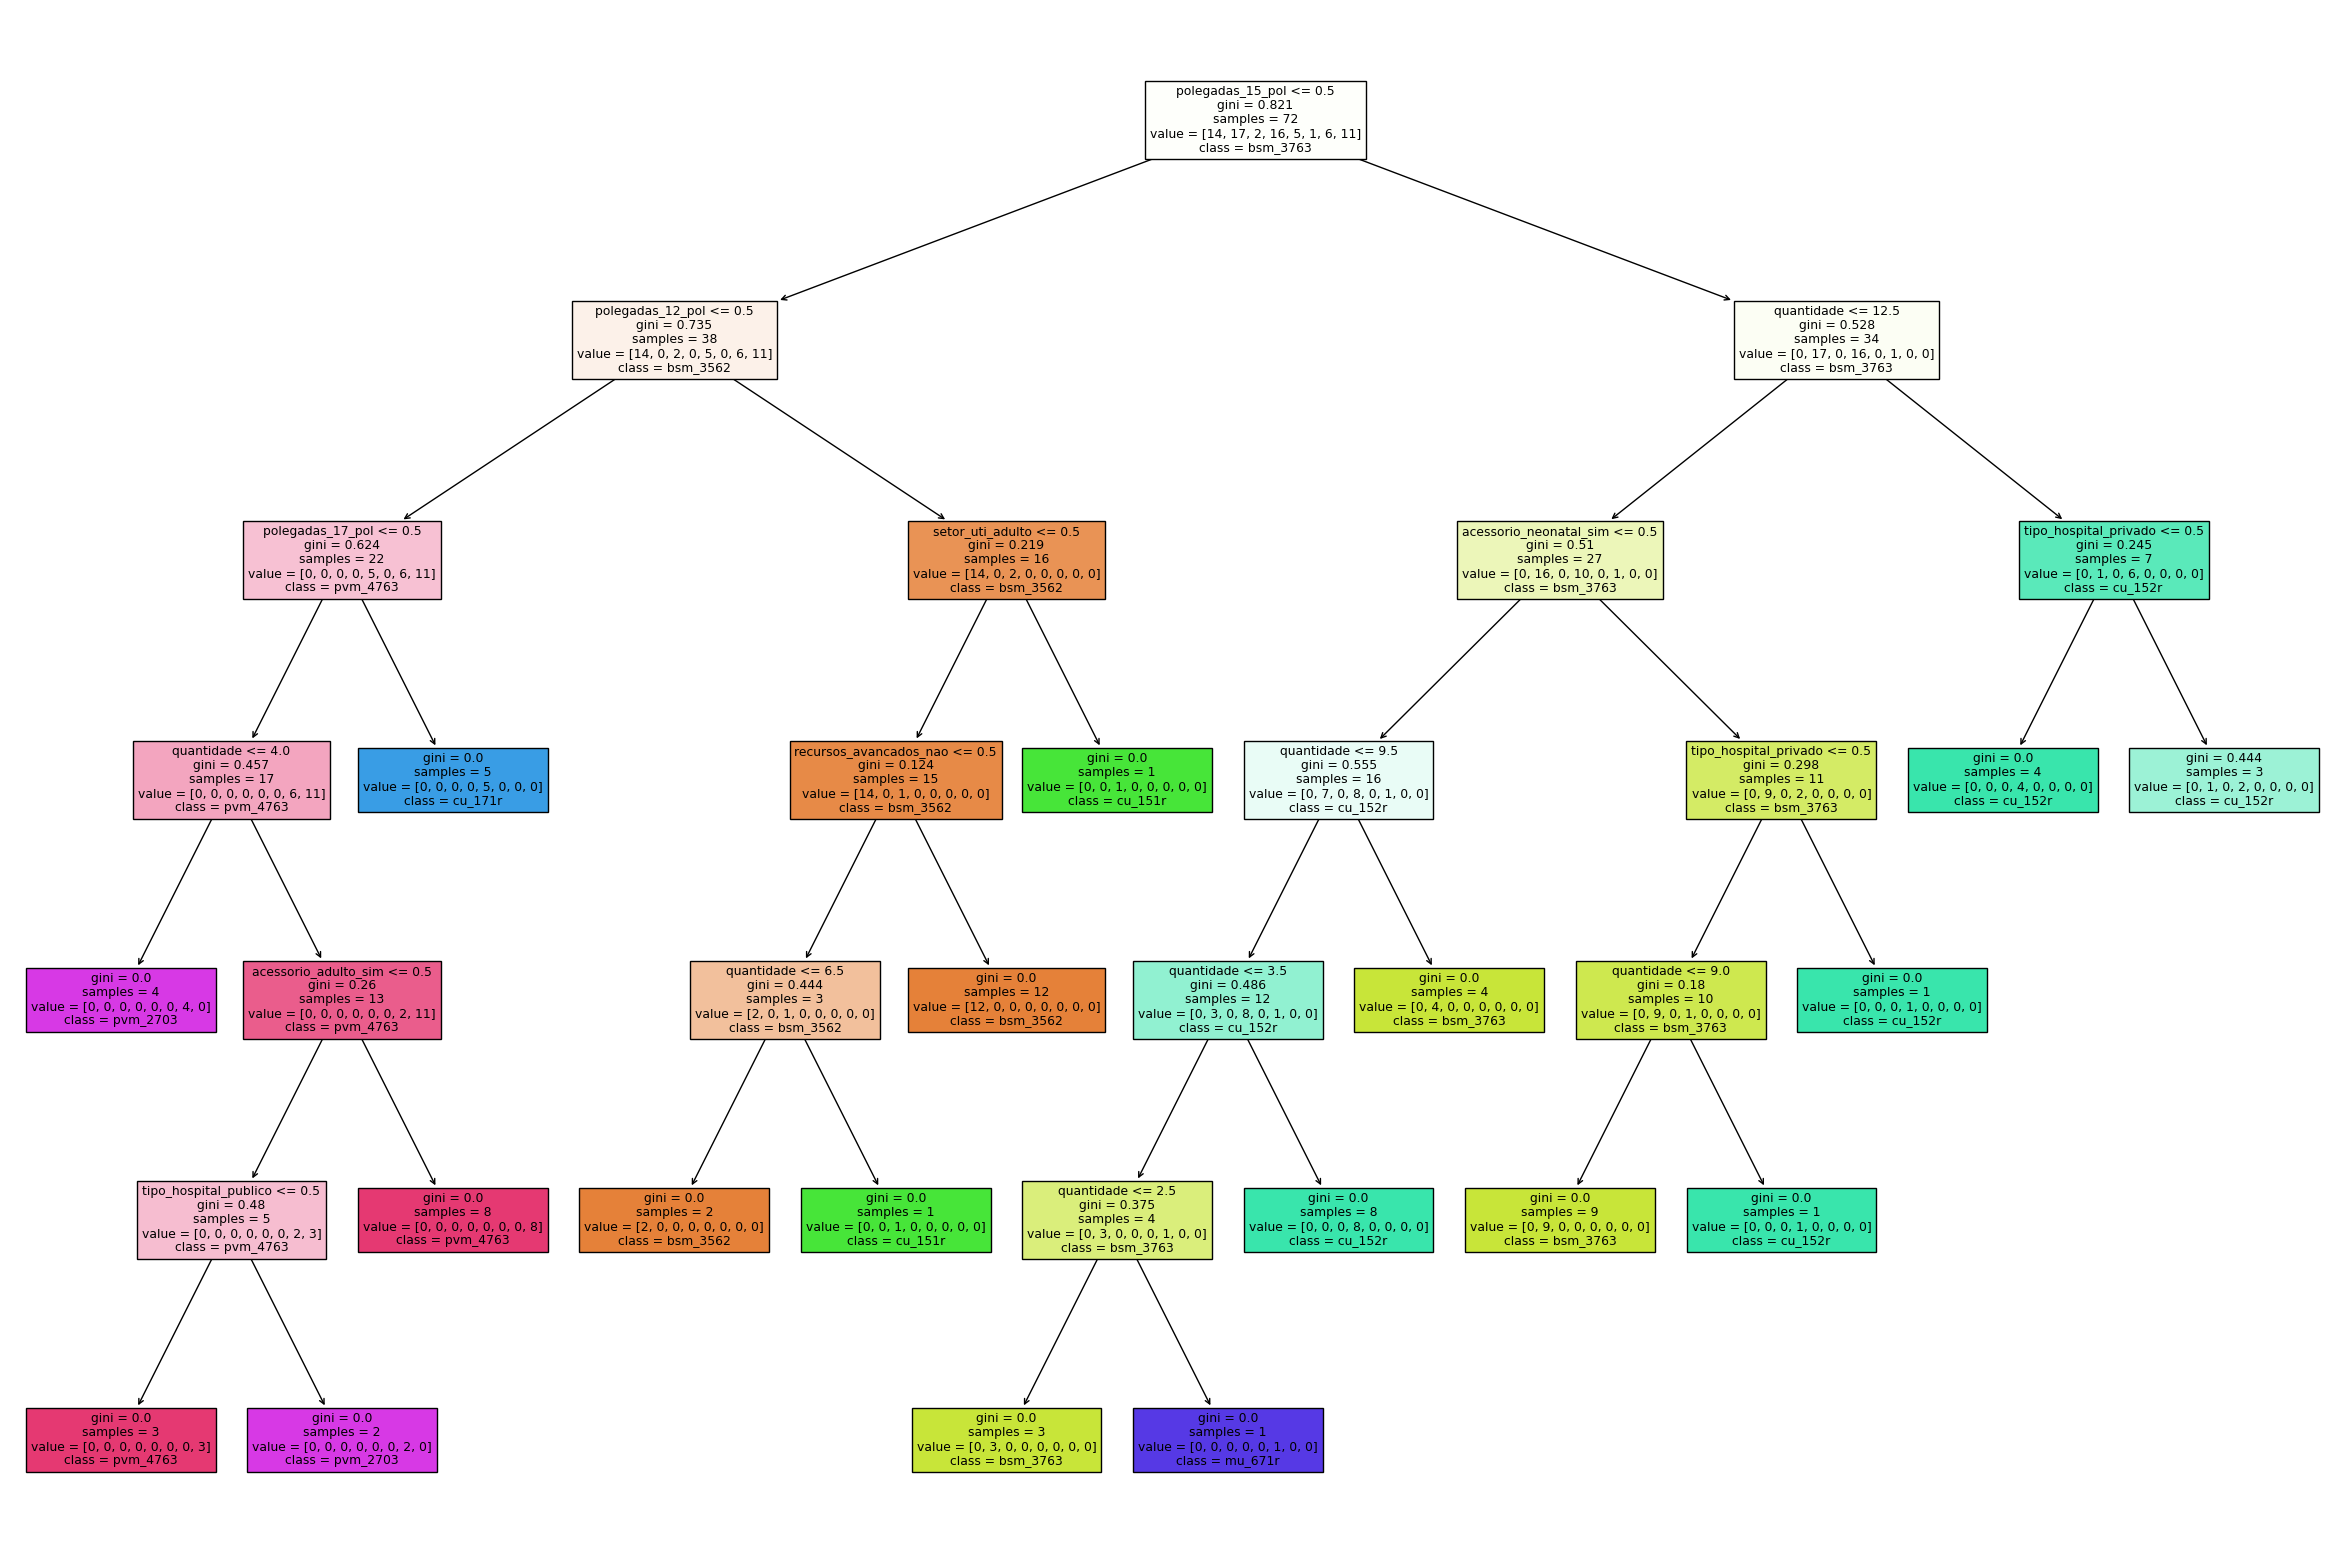

In [33]:
# Plotar a árvore de decisão
plt.figure(figsize=(30,20))
tree.plot_tree(arvore_classificadora, filled=True, class_names=arvore_classificadora.classes_, feature_names=x_dummies_columns)
plt.savefig(r'C:\Users\arthi\Documents\projetos\arvore_decisao.jpg', format='jpg')
plt.show()


In [35]:
# Execução do algoritmo com dados coletados em um questionário - #1
x_tipo_hospital = 'publico'
x_setor = 'uti_neonatal'
x_quantidade = 10
x_acessorio_adulto = 'nao'
x_acessorio_pediatrico = 'nao'
x_acessorio_neonatal = 'sim'
x_recursos_avancados = 'sim'
x_polegadas = '15_pol'
x_central = 'sim'

x_questionario = {
    'tipo_hospital': [x_tipo_hospital],
    'setor': [x_setor],
    'quantidade': [x_quantidade],
    'acessorio_adulto': [x_acessorio_adulto],
    'acessorio_pediatrico': [x_acessorio_pediatrico],
    'acessorio_neonatal': [x_acessorio_neonatal],
    'recursos_avancados': [x_recursos_avancados],
    'polegadas': [x_polegadas],
    'central': [x_central]
}

dataframe_questionario = pd.DataFrame(x_questionario)

x_questionario_dummies = pd.get_dummies(dataframe_questionario)

x_dummies, x_questionario_dummies = x_dummies.align(x_questionario_dummies, join='left', axis=1, fill_value=0)

y_questionario = arvore_classificadora.predict(x_questionario_dummies)
print(f'De acordo com o questionário, o modelo sugerido é: {y_questionario}')

De acordo com o questionário, o modelo sugerido é: ['cu_152r']


In [37]:
# Execução do algoritmo com dados coletados em um questionário - #2
x_tipo_hospital = 'privado'
x_setor = 'uti_adulto'
x_quantidade = 14
x_acessorio_adulto = 'sim'
x_acessorio_pediatrico = 'nao'
x_acessorio_neonatal = 'nao'
x_recursos_avancados = 'sim'
x_polegadas = '17_pol'
x_central = 'sim'

x_questionario = {
    'tipo_hospital': [x_tipo_hospital],
    'setor': [x_setor],
    'quantidade': [x_quantidade],
    'acessorio_adulto': [x_acessorio_adulto],
    'acessorio_pediatrico': [x_acessorio_pediatrico],
    'acessorio_neonatal': [x_acessorio_neonatal],
    'recursos_avancados': [x_recursos_avancados],
    'polegadas': [x_polegadas],
    'central': [x_central]
}

dataframe_questionario = pd.DataFrame(x_questionario)

x_questionario_dummies = pd.get_dummies(dataframe_questionario)

x_dummies, x_questionario_dummies = x_dummies.align(x_questionario_dummies, join='left', axis=1, fill_value=0)

y_questionario = arvore_classificadora.predict(x_questionario_dummies)
print(f'De acordo com o questionário, o modelo sugerido é: {y_questionario}')

De acordo com o questionário, o modelo sugerido é: ['cu_171r']


In [39]:
# Execução do algoritmo com dados coletados em um questionário - #3
x_tipo_hospital = 'privado'
x_setor = 'unidade_emergencia'
x_quantidade = 7
x_acessorio_adulto = 'sim'
x_acessorio_pediatrico = 'sim'
x_acessorio_neonatal = 'nao'
x_recursos_avancados = 'nao'
x_polegadas = '10_pol'
x_central = 'nao'

x_questionario = {
    'tipo_hospital': [x_tipo_hospital],
    'setor': [x_setor],
    'quantidade': [x_quantidade],
    'acessorio_adulto': [x_acessorio_adulto],
    'acessorio_pediatrico': [x_acessorio_pediatrico],
    'acessorio_neonatal': [x_acessorio_neonatal],
    'recursos_avancados': [x_recursos_avancados],
    'polegadas': [x_polegadas],
    'central': [x_central]
}

dataframe_questionario = pd.DataFrame(x_questionario)

x_questionario_dummies = pd.get_dummies(dataframe_questionario)

x_dummies, x_questionario_dummies = x_dummies.align(x_questionario_dummies, join='left', axis=1, fill_value=0)

y_questionario = arvore_classificadora.predict(x_questionario_dummies)
print(f'De acordo com o questionário, o modelo sugerido é: {y_questionario}')

De acordo com o questionário, o modelo sugerido é: ['pvm_4763']
